# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Loading the data

In [6]:
df = pd.read_json("movies_dataset.json")

Check the dataframe shape (#rows and #columns)

In [7]:
print("DataFrame Shape (Rows, Columns):", df.shape)

DataFrame Shape (Rows, Columns): (5043, 14)


Let's check the data types of the columns

In [8]:
print("\nDataFrame Data Types:")
print(df.dtypes)


DataFrame Data Types:
color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object


Column Selection

In [ ]:
df[['title_year', 'country', 'duration', 'imdb_score', 'gross', 'budget']].head()


---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [ ]:
cols_to_drop = ['movie_imdb_link', 'num_critic_for_reviews', 'genre']
df = df.drop(columns=cols_to_drop, errors='ignore')
df.head()


Exercise: Remove the rest of the columns 


In [16]:
keep_cols = [
    'title_year',      
    'country',         
    'duration',        
    'imdb_score',      
    'gross',           
    'budget'           
]

keep_cols_existing = [c for c in keep_cols if c in df.columns]
df = df[keep_cols_existing].copy()
df.head()


,title_year,country,duration,imdb_score,gross,budget
0,2009.0,USA,178.0,7.9,760505847.0,237000000.0
1,2007.0,USA,169.0,7.1,309404152.0,300000000.0
2,2015.0,UK,148.0,6.8,200074175.0,245000000.0
3,2012.0,USA,164.0,8.5,448130642.0,250000000.0
4,NaN,NaN,NaN,7.1,NaN,NaN


Let's check the shape again

In [17]:
df.shape, list(df.columns)


((5043, 6),
 ['title_year', 'country', 'duration', 'imdb_score', 'gross', 'budget'])

Let's convert the dtype of `title_year` column to integer

In [18]:
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')
df = df.dropna(subset=['title_year'])
df['title_year'] = df['title_year'].astype(int)

df[['title_year']].head()


,title_year
0,2009
1,2007
2,2015
3,2012
5,2012


Let's check the dataframe again

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 0 to 5042
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title_year  4935 non-null   int64  
 1   country     4934 non-null   object 
 2   duration    4923 non-null   float64
 3   imdb_score  4935 non-null   float64
 4   gross       4156 non-null   float64
 5   budget      4543 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 269.9+ KB


Renaming some columns: 
- changing `gross` to `movie_income`

In [20]:
df = df.rename(columns={'gross': 'movie_income'})
df.head()

,title_year,country,duration,imdb_score,movie_income,budget
0,2009,USA,178.0,7.9,760505847.0,237000000.0
1,2007,USA,169.0,7.1,309404152.0,300000000.0
2,2015,UK,148.0,6.8,200074175.0,245000000.0
3,2012,USA,164.0,8.5,448130642.0,250000000.0
5,2012,USA,132.0,6.6,73058679.0,263700000.0


Exercise: Rename the `budget` column to `movie_budget`

In [21]:
df = df.rename(columns={'budget': 'movie_budget'})
df.head()

,title_year,country,duration,imdb_score,movie_income,movie_budget
0,2009,USA,178.0,7.9,760505847.0,237000000.0
1,2007,USA,169.0,7.1,309404152.0,300000000.0
2,2015,UK,148.0,6.8,200074175.0,245000000.0
3,2012,USA,164.0,8.5,448130642.0,250000000.0
5,2012,USA,132.0,6.6,73058679.0,263700000.0


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


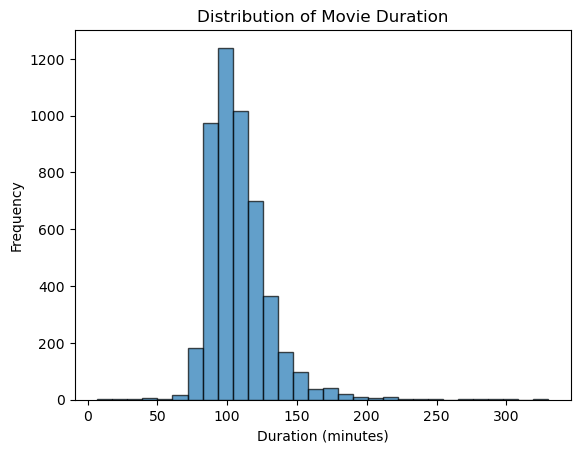

In [24]:
ax = df['duration'].dropna().plot(kind='hist', bins=30, alpha=0.7, edgecolor='black')
ax.set_title('Distribution of Movie Duration')
ax.set_xlabel('Duration (minutes)')
plt.show()

Exercise: Create a hitogram to see the distribution of `imdb_score` column

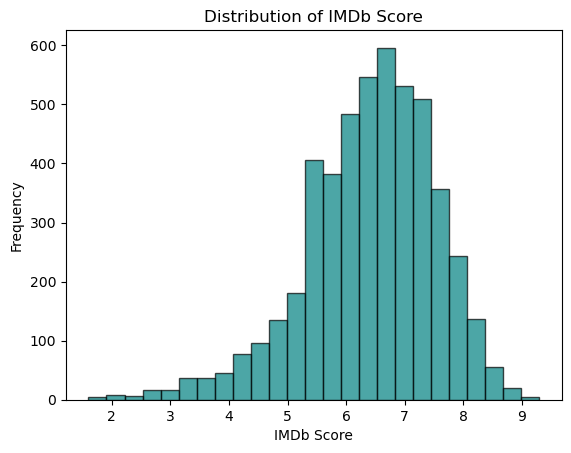

In [25]:
ax = df['imdb_score'].dropna().plot(kind='hist', bins=25, alpha=0.7, edgecolor='black', color='teal')
ax.set_title('Distribution of IMDb Score')
ax.set_xlabel('IMDb Score')
plt.show()


Let's check how many movies have the `imdb_score` less than `4`.

In [26]:
low_score_count = (df['imdb_score'] < 4).sum()
low_score_count

153

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

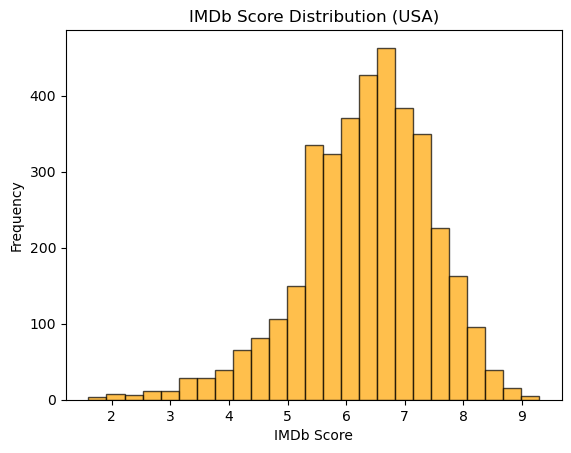

In [27]:
usa = df[df['country'] == 'USA']
ax = usa['imdb_score'].dropna().plot(kind='hist', bins=25, alpha=0.7, edgecolor='black', color='orange')
ax.set_title('IMDb Score Distribution (USA)')
ax.set_xlabel('IMDb Score')
plt.show()


---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [28]:
movies_per_year = df.groupby('title_year', dropna=False)['imdb_score'].size().rename('count').reset_index()
year_max = movies_per_year.loc[movies_per_year['count'].idxmax(), 'title_year']
year_min = movies_per_year.loc[movies_per_year['count'].idxmin(), 'title_year']
year_max, year_min

(2009, 1916)

Let's create a line chart to show the result

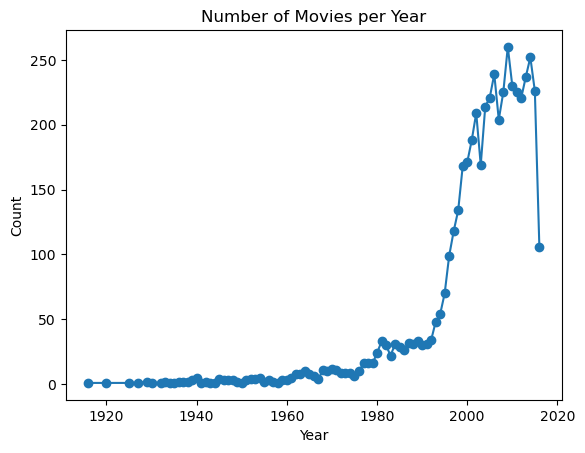

In [29]:
mpy_sorted = movies_per_year.sort_values('title_year')
ax = mpy_sorted.plot(x='title_year', y='count', kind='line', marker='o', legend=False)
ax.set_title('Number of Movies per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [30]:
avg_score_per_year = df.groupby('title_year', dropna=False)['imdb_score'].mean().rename('avg_imdb_score').reset_index()

year_max_avg = avg_score_per_year.loc[avg_score_per_year['avg_imdb_score'].idxmax(), 'title_year']
year_min_avg = avg_score_per_year.loc[avg_score_per_year['avg_imdb_score'].idxmin(), 'title_year']
year_max_avg, year_min_avg

(1957, 1920)

Let's Use a barchart to visualize the result

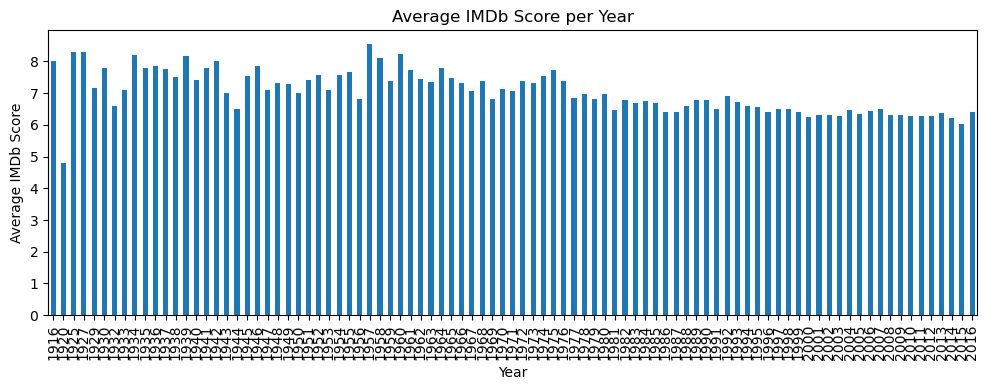

In [31]:
asp_sorted = avg_score_per_year.sort_values('title_year')
ax = asp_sorted.plot(x='title_year', y='avg_imdb_score', kind='bar', legend=False, figsize=(10,4))
ax.set_title('Average IMDb Score per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average IMDb Score')
plt.tight_layout()
plt.show()

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

In [32]:
if 'movie_budget' in df.columns:
    df['movie_budget'] = pd.to_numeric(df['movie_budget'], errors='coerce')

budget_per_year = df.groupby('title_year', dropna=False)['movie_budget'].sum(min_count=1).rename('total_budget').reset_index()

year_max_budget = budget_per_year.loc[budget_per_year['total_budget'].idxmax(), 'title_year']
year_min_budget = budget_per_year.loc[budget_per_year['total_budget'].idxmin(), 'title_year']
year_max_budget, year_min_budget


(2006, 1920)

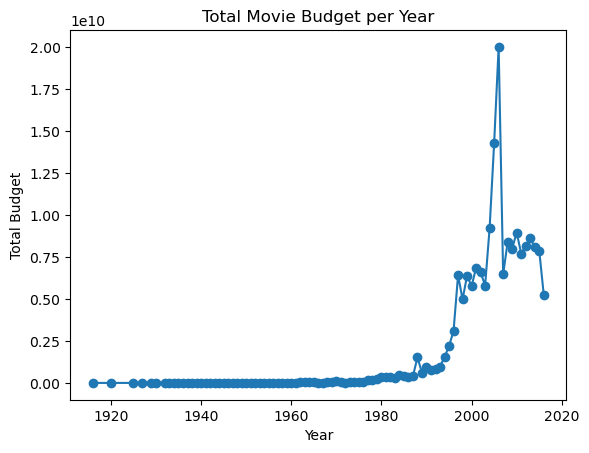

In [33]:
bpy_sorted = budget_per_year.sort_values('title_year')
ax = bpy_sorted.plot(x='title_year', y='total_budget', kind='line', marker='o', legend=False)
ax.set_title('Total Movie Budget per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Budget')
plt.show()


Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

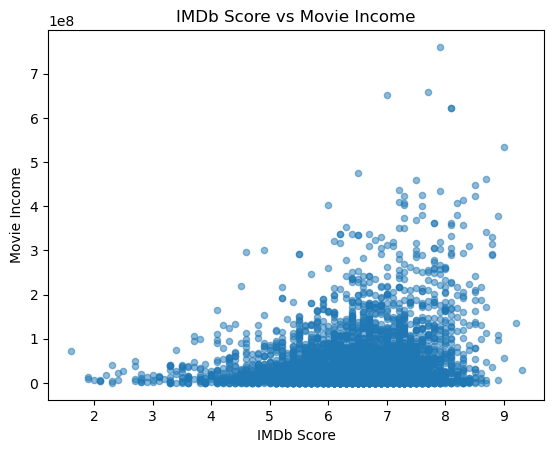

In [34]:
if 'movie_income' in df.columns:
    df['movie_income'] = pd.to_numeric(df['movie_income'], errors='coerce')

corr_df = df[['imdb_score', 'movie_income']].dropna()

ax = corr_df.plot(kind='scatter', x='imdb_score', y='movie_income', alpha=0.5)
ax.set_title('IMDb Score vs Movie Income')
ax.set_xlabel('IMDb Score')
ax.set_ylabel('Movie Income')
plt.show()

In [36]:
corr_matrix = corr_df.corr(method='pearson')
corr_matrix

,imdb_score,movie_income
imdb_score,1.000000,0.199432
movie_income,0.199432,1.000000


Let's drop the rows with `non` values

In [37]:
df['imdb_score']   = pd.to_numeric(df['imdb_score'], errors='coerce')
df['movie_income'] = pd.to_numeric(df['movie_income'], errors='coerce')

corr_df = df.dropna(subset=['imdb_score', 'movie_income']).copy()
corr_df.head()

,title_year,country,duration,imdb_score,movie_income,movie_budget
0,2009,USA,178.0,7.9,760505847.0,237000000.0
1,2007,USA,169.0,7.1,309404152.0,300000000.0
2,2015,UK,148.0,6.8,200074175.0,245000000.0
3,2012,USA,164.0,8.5,448130642.0,250000000.0
5,2012,USA,132.0,6.6,73058679.0,263700000.0


Let's create a scatter plot to see the data

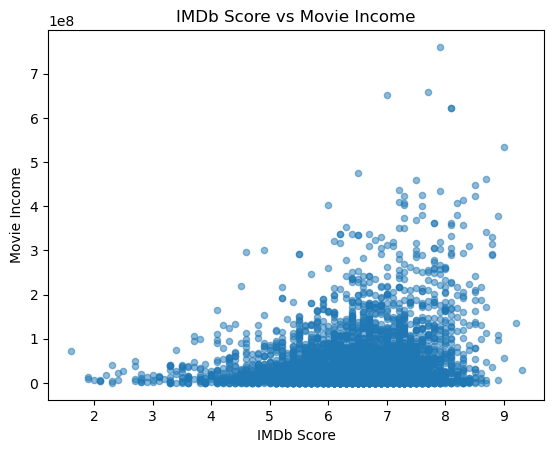

In [39]:
df['imdb_score']   = pd.to_numeric(df['imdb_score'], errors='coerce')
df['movie_income'] = pd.to_numeric(df['movie_income'], errors='coerce')
corr_df = df.dropna(subset=['imdb_score', 'movie_income']).copy()

ax = corr_df.plot(kind='scatter', x='imdb_score', y='movie_income', alpha=0.5)
ax.set_title('IMDb Score vs Movie Income')
ax.set_xlabel('IMDb Score')
ax.set_ylabel('Movie Income')
plt.show()



Let's generate the correlation matrix

In [ ]:

df['imdb_score']   = pd.to_numeric(df['imdb_score'], errors='coerce')
df['movie_income'] = pd.to_numeric(df['movie_income'], errors='coerce')
df['movie_budget'] = pd.to_numeric(df.get('movie_budget', pd.Series(index=df.index)), errors='coerce')

corr_df = df[['imdb_score', 'movie_income', 'movie_budget']].dropna(how='any').copy()
corr_df.head()


In [40]:
corr_matrix = corr_df.corr(method='pearson')
corr_matrix

,title_year,duration,imdb_score,movie_income,movie_budget
title_year,1.000000,-0.124276,-0.131504,0.030886,0.044990
duration,-0.124276,1.000000,0.350856,0.254586,0.069574
imdb_score,-0.131504,0.350856,1.000000,0.199432,0.029135
movie_income,0.030886,0.254586,0.199432,1.000000,0.102179
movie_budget,0.044990,0.069574,0.029135,0.102179,1.000000


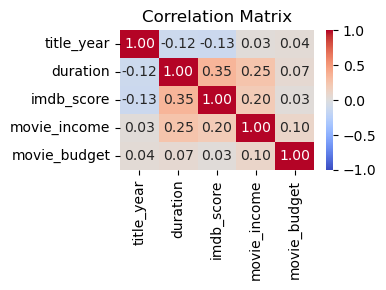

In [43]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
